In [1]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
import os
os.listdir('../data/Landsat8/')

['LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif',
 'LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif']

In [7]:
#import bands as separate 1 band raster
band4 = rasterio.open('../data/Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif') #red
band5 = rasterio.open('../data/Landsat8/LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif') #nir


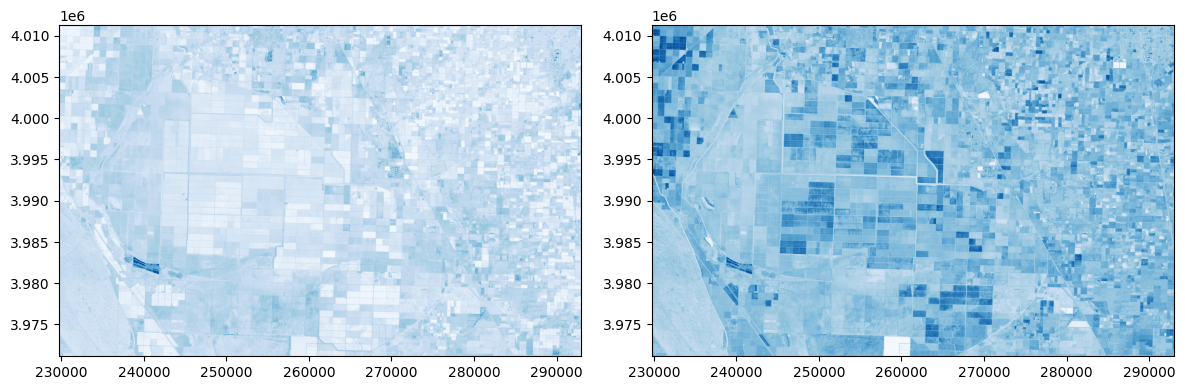

In [8]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [9]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

nir

array([[24079., 24061., 24131., ...,  9747., 10231., 11190.],
       [24169., 24213., 24173., ...,  9900., 10084., 10855.],
       [24253., 24438., 24265., ...,  9910., 10079., 11592.],
       ...,
       [21594., 20611., 20397., ..., 20179., 20035., 19973.],
       [21441., 20507., 19362., ..., 20189., 19976., 19941.],
       [21080., 20536., 20172., ..., 20531., 20744., 20915.]])

In [11]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]
#export ndvi image
ndviImage = rasterio.open('../data/Output/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()


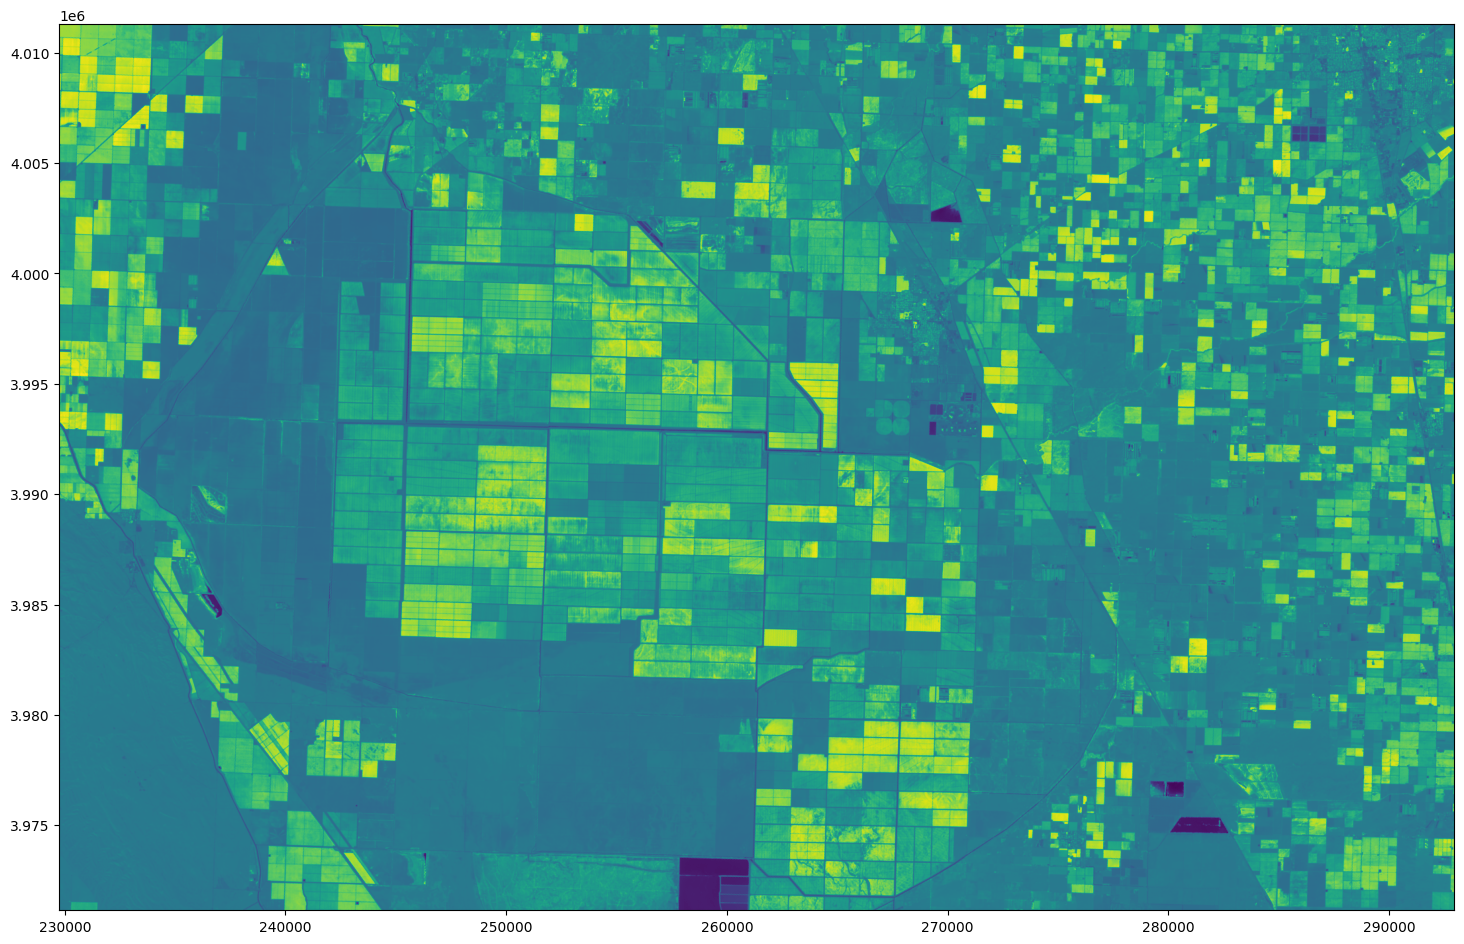

<Axes: >

In [13]:
#plot ndvi
ndvi = rasterio.open('../data/Output/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)